In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_circle, hough_circle_peaks, hough_ellipse
from skimage.draw import circle_perimeter, ellipse_perimeter

In [2]:
import matplotlib.image as mpimg

In [3]:
# read the image
img=mpimg.imread('./input/test_ronchi/test_ronchi_1.png')
img.shape

(2087, 2004, 4)

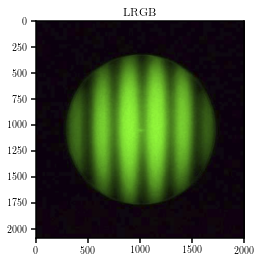

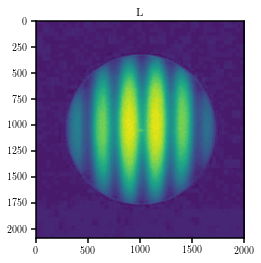

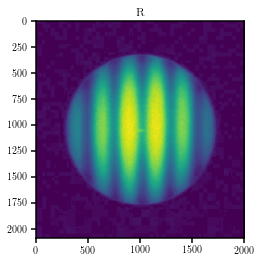

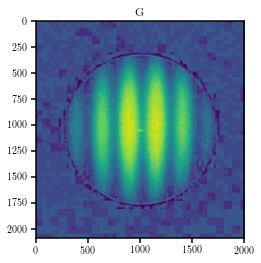

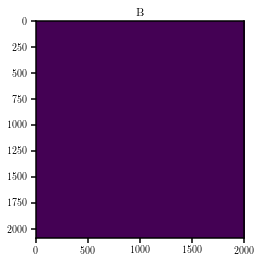

In [4]:
# show the image
plt.figure(-1)
plt.title('LRGB')
imgplot = plt.imshow(img)

plt.figure(0)
plt.title('L')
imgplot = plt.imshow(img[:,:,0])

plt.figure(1)
plt.title('R')
imgplot = plt.imshow(img[:,:,1])

plt.figure(2)
plt.title('G')
imgplot = plt.imshow(img[:,:,2])

plt.figure(3)
plt.title('B')
imgplot = plt.imshow(img[:,:,3])

In [5]:
# keep only the best channel
image = img_as_ubyte(img[:,:,1])

(array([1.384944e+06, 5.209100e+04, 4.245670e+05, 4.989510e+05,
        1.172840e+05, 2.384800e+04, 1.530800e+04, 1.551900e+04,
        6.345000e+03, 1.452000e+04, 8.006000e+03, 1.491700e+04,
        1.266800e+04, 1.655600e+04, 9.659000e+03, 1.678200e+04,
        1.298600e+04, 1.760500e+04, 1.464000e+04, 2.483200e+04,
        1.552500e+04, 2.236400e+04, 1.578100e+04, 2.601200e+04,
        2.160500e+04, 3.610200e+04, 2.134500e+04, 3.081800e+04,
        2.523200e+04, 3.217500e+04, 1.777300e+04, 3.383200e+04,
        1.794900e+04, 2.748600e+04, 2.056700e+04, 3.882700e+04,
        1.924000e+04, 2.838400e+04, 1.984400e+04, 2.372800e+04,
        1.526900e+04, 2.556100e+04, 1.573600e+04, 2.543900e+04,
        2.626400e+04, 2.099600e+04, 1.330800e+04, 2.233100e+04,
        1.316200e+04, 2.220800e+04, 1.734000e+04, 2.623100e+04,
        1.516500e+04, 2.283300e+04, 1.522900e+04, 1.903100e+04,
        1.349700e+04, 2.353000e+04, 1.464400e+04, 2.222800e+04,
        1.633700e+04, 2.285600e+04, 1.49

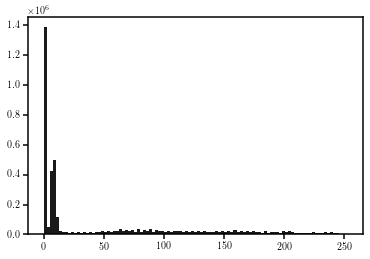

In [6]:
plt.hist(image.flatten(), bins=101)

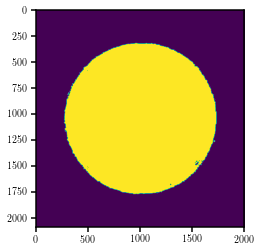

In [7]:
# Create contrasted image, to help detect the edge of the mirror
mirror = 1. * (image>19.)

plt.imshow(mirror)

In [8]:
# canny?

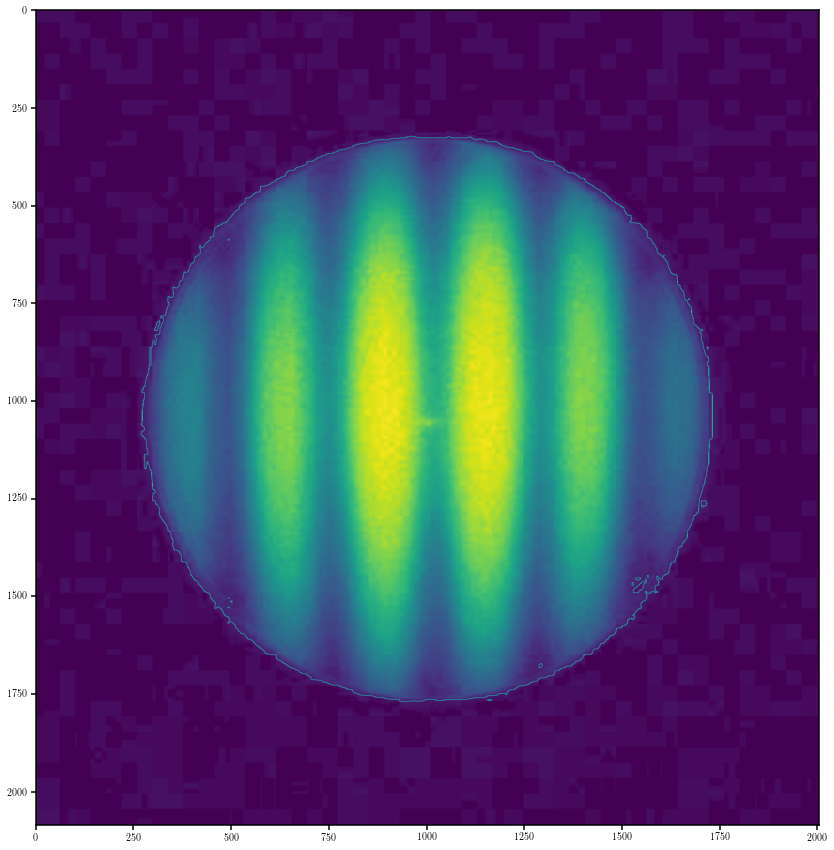

In [9]:
# Detect edge, compare to initial image

# edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)
edges = canny(mirror, sigma=1.)

fig=plt.figure(0, figsize=(15, 15))
ax=fig.add_subplot(111)
ax.imshow(200.*edges + image)
plt.show()

In [10]:
# Detect radii
hough_radii = np.arange(700, 800, 1)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 1 circle
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1)

print cx
print cy
print radii

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(cx)? (1083018600.py, line 9)

In [11]:
# circle_perimeter?

NameError: name 'cy' is not defined

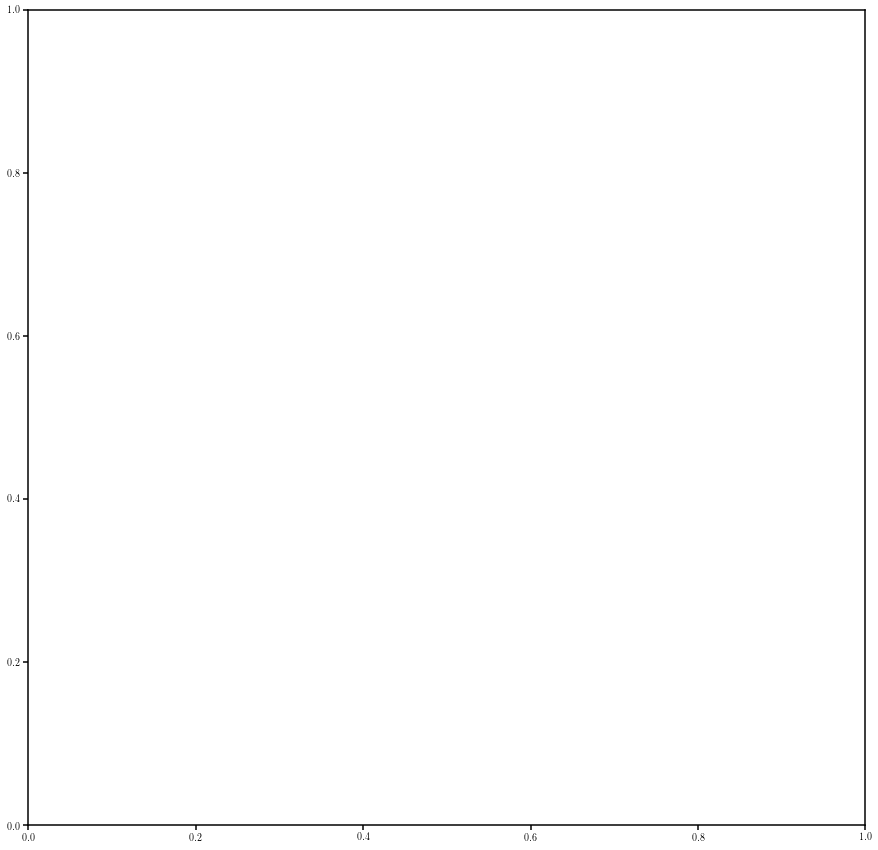

In [13]:
# Compare the detected circle to the edge
imageCircle = edges.copy()

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 15))
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=imageCircle.shape)
    
    print(center_y, center_x, radius)
    print(circy.shape, circx.shape)
    print(imageCircle.shape)
    
    imageCircle[circy, circx] = 200#(220, 20, 20)

ax.imshow(imageCircle, cmap=plt.cm.gray)
plt.show()

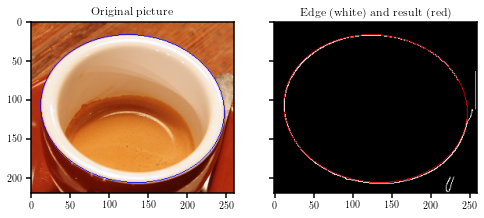

In [14]:
# Ellipse detection, from the website:
# https://scikit-image.org/docs/dev/auto_examples/edges/plot_circular_elliptical_hough_transform.html



import matplotlib.pyplot as plt

from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

# Load picture, convert to grayscale and detect edges
image_rgb = data.coffee()[0:220, 160:420]
image_gray = color.rgb2gray(image_rgb)
edges = canny(image_gray, sigma=2.0,
              low_threshold=0.55, high_threshold=0.8)

# Perform a Hough Transform
# The accuracy corresponds to the bin size of a major axis.
# The value is chosen in order to get a single high accumulator.
# The threshold eliminates low accumulators
result = hough_ellipse(edges, accuracy=20, threshold=250,
                       min_size=100, max_size=120)
result.sort(order='accumulator')

# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (250, 0, 0)

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4),
                                sharex=True, sharey=True)

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges)

plt.show()